# Real Estate Stock Price Prediction - Data cleaning and preparation steps

In [14]:
# Import all necessary libraries for the project

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)

In [15]:
# Read csv file and add in a dataframe
re_df1 = pd.read_csv(r"..\source_data\florida_real_estate_dataset.csv")

In [16]:
# Display the first few records
re_df1.head()

,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date
0,30750.0,for_sale,649000.0,5.0,4.0,0.33,1444806.0,Apopka,Florida,32703.0,3690.0,10/22/2020
1,36577.0,for_sale,395000.0,3.0,2.0,0.21,632930.0,Apopka,Florida,32703.0,2046.0,10/31/2013
2,16352.0,for_sale,418000.0,4.0,3.0,0.24,24767.0,Apopka,Florida,32703.0,2247.0,7/29/2015
3,30655.0,for_sale,57000.0,2.0,1.0,0.06,923773.0,Apopka,Florida,32703.0,568.0,6/14/2016
4,16352.0,for_sale,210000.0,3.0,2.0,0.29,713543.0,Apopka,Florida,32703.0,1188.0,5/16/2003


In [17]:
# Display number of rows and columns
re_df1.shape

(79146, 12)

In [21]:
# Drop columns that are not needed for data analysis
re_df2 = re_df1.drop(['brokered_by','status','street','state','prev_sold_date','acre_lot'], axis='columns')

In [22]:
# Display first few records of updated dataframe
re_df2.head()

,price,bed,bath,city,zip_code,house_size
0,649000.0,5.0,4.0,Apopka,32703.0,3690.0
1,395000.0,3.0,2.0,Apopka,32703.0,2046.0
2,418000.0,4.0,3.0,Apopka,32703.0,2247.0
3,57000.0,2.0,1.0,Apopka,32703.0,568.0
4,210000.0,3.0,2.0,Apopka,32703.0,1188.0


# Data cleaning steps

In [23]:
# Find count of rows with null values for each of the category
re_df2.isnull().sum()

price            12
bed           14411
bath          15120
city            118
zip_code         10
house_size    15162
dtype: int64

In [30]:
# Remove all rows with null values
re_df_clean = re_df2.dropna()

In [34]:
# Check if any rows have null values now
re_df_clean.isnull().sum()

price         0
bed           0
bath          0
city          0
zip_code      0
house_size    0
dtype: int64

In [35]:
# Display few of the rows of the updated dataframe
re_df_clean.head()

,price,bed,bath,city,zip_code,house_size
0,649000.0,5.0,4.0,Apopka,32703.0,3690.0
1,395000.0,3.0,2.0,Apopka,32703.0,2046.0
2,418000.0,4.0,3.0,Apopka,32703.0,2247.0
3,57000.0,2.0,1.0,Apopka,32703.0,568.0
4,210000.0,3.0,2.0,Apopka,32703.0,1188.0


In [36]:
# Check the number of rows and cloumns of the updated dataframe
re_df_clean.shape

(62009, 6)

In [38]:
# Check number of rows with number of bedrooms > 10
re_df_clean[re_df_clean.bed>10]

,price,bed,bath,city,zip_code,house_size
2978,749900.0,14.0,7.0,Deland,32720.0,555.0
3095,325000.0,11.0,6.0,Deland,32724.0,4012.0
6006,699900.0,12.0,6.0,Orlando,32805.0,3384.0
8513,25000000.0,12.0,15.0,Orlando,32836.0,14706.0
9358,4250000.0,11.0,14.0,Reunion,34747.0,10377.0
...,...,...,...,...,...,...
69553,1900000.0,55.0,29.0,Mulberry,33860.0,28050.0
69656,3215625.0,74.0,49.0,Fort Meade,33841.0,45580.0
74927,2500000.0,24.0,24.0,Rotonda West,33947.0,11328.0
74961,999999.0,12.0,9.0,Arcadia,34266.0,3456.0


In [39]:
# Create a new dataframe with bed size > 10 removed
re_df_cleaned = re_df_clean[re_df_clean['bed'] <= 10]

In [40]:
# Display some of the rows of the cleaned dataset
re_df_cleaned.head()

,price,bed,bath,city,zip_code,house_size
0,649000.0,5.0,4.0,Apopka,32703.0,3690.0
1,395000.0,3.0,2.0,Apopka,32703.0,2046.0
2,418000.0,4.0,3.0,Apopka,32703.0,2247.0
3,57000.0,2.0,1.0,Apopka,32703.0,568.0
4,210000.0,3.0,2.0,Apopka,32703.0,1188.0


In [42]:
# Check the number of rows and columns of the updated dataframe
re_df_cleaned.shape

(61906, 6)

In [43]:
# Check if there are any rows with number of beds > 10
re_df_cleaned[re_df_cleaned.bed>10]

,price,bed,bath,city,zip_code,house_size


# Feature Engineering

In [46]:
# Copy dataframe into new dataframe to create an additional column i.e. price_per_sqft
re_df_cleaned2 = re_df_cleaned.copy()
re_df_cleaned2['price_per_sqft'] = (re_df_cleaned['price'] / re_df_cleaned['house_size']).round(2)
re_df_cleaned2.head()

,price,bed,bath,city,zip_code,house_size,price_per_sqft
0,649000.0,5.0,4.0,Apopka,32703.0,3690.0,175.88
1,395000.0,3.0,2.0,Apopka,32703.0,2046.0,193.06
2,418000.0,4.0,3.0,Apopka,32703.0,2247.0,186.03
3,57000.0,2.0,1.0,Apopka,32703.0,568.0,100.35
4,210000.0,3.0,2.0,Apopka,32703.0,1188.0,176.77


In [49]:
# Find unique count of cities
len(re_df_cleaned2.city.unique())

348

In [51]:
# Clean up city column values by removing leading and trailing spaces
re_df_cleaned2.city = re_df_cleaned2.city.apply(lambda x: x.strip())

# Find and display  the count of rows per city
city_stats = re_df_cleaned2.groupby('city')['city'].agg('count').sort_values(ascending = False)
city_stats

city
Miami              5376
Orlando            2647
Tampa              2378
Miami Beach        1677
Fort Lauderdale    1498
                   ... 
Citra                 1
Lakewood Ranch        1
Hernando              1
Montverde             1
Tarpon Springs        1
Name: city, Length: 348, dtype: int64

In [52]:
# Find out count of cities with less than 10 data points
len(city_stats[city_stats<=10])

91

In [53]:
# Display cities with less than 10 data points
city_stats_less_than_10 = city_stats[city_stats<=10]
city_stats_less_than_10

city
Sarasota          10
Morriston         10
Bradenton         10
Zolfo Springs     10
Tavares            9
                  ..
Citra              1
Lakewood Ranch     1
Hernando           1
Montverde          1
Tarpon Springs     1
Name: city, Length: 91, dtype: int64

In [56]:
# Replace all the cities with less than 10 data points with "other"
re_df_cleaned2.city = re_df_cleaned2.city.apply(lambda x: 'other' if x in city_stats_less_than_10 else x)
len(re_df_cleaned2.city.unique())

258

In [57]:
re_df_cleaned2.head()

,price,bed,bath,city,zip_code,house_size,price_per_sqft
0,649000.0,5.0,4.0,Apopka,32703.0,3690.0,175.88
1,395000.0,3.0,2.0,Apopka,32703.0,2046.0,193.06
2,418000.0,4.0,3.0,Apopka,32703.0,2247.0,186.03
3,57000.0,2.0,1.0,Apopka,32703.0,568.0,100.35
4,210000.0,3.0,2.0,Apopka,32703.0,1188.0,176.77


# Outlier detection and removal

In [58]:
# Finding out the data points where total square feet of the house divided by number of bedrooms is less than 300
re_df_cleaned2[(re_df_cleaned2.house_size/re_df_cleaned2.bed)<300].head()

,price,bed,bath,city,zip_code,house_size,price_per_sqft
3,57000.0,2.0,1.0,Apopka,32703.0,568.0,100.35
1261,300000.0,4.0,2.0,Debary,32713.0,1104.0,271.74
1466,350000.0,5.0,2.0,Deltona,32738.0,1358.0,257.73
1663,214900.0,3.0,1.0,Deland,32720.0,874.0,245.88
1934,199000.0,4.0,2.0,Deltona,32725.0,1080.0,184.26


In [59]:
re_df_cleaned2.shape

(61906, 7)

In [70]:
# Remove above outliers
re_df_cleaned3 = re_df_cleaned2[~((re_df_cleaned2.house_size/re_df_cleaned2.bed)<300)]
re_df_cleaned3.shape

(61206, 7)

In [69]:
# Remove extremely low and extremely high price per sqft columns
re_df_cleaned3.price_per_sqft.describe()

count    61206.000000
mean       374.316130
std        420.305886
min          1.540000
25%        195.730000
50%        255.335000
75%        386.732500
max      19000.000000
Name: price_per_sqft, dtype: float64

In [75]:
# Write function to remove outliers  

def remove_ppsqft_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('city'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out

re_df_cleaned4 = remove_ppsqft_outliers(re_df_cleaned3)
re_df_cleaned4.shape
    

(50623, 7)

Text(0, 0.5, 'Count')

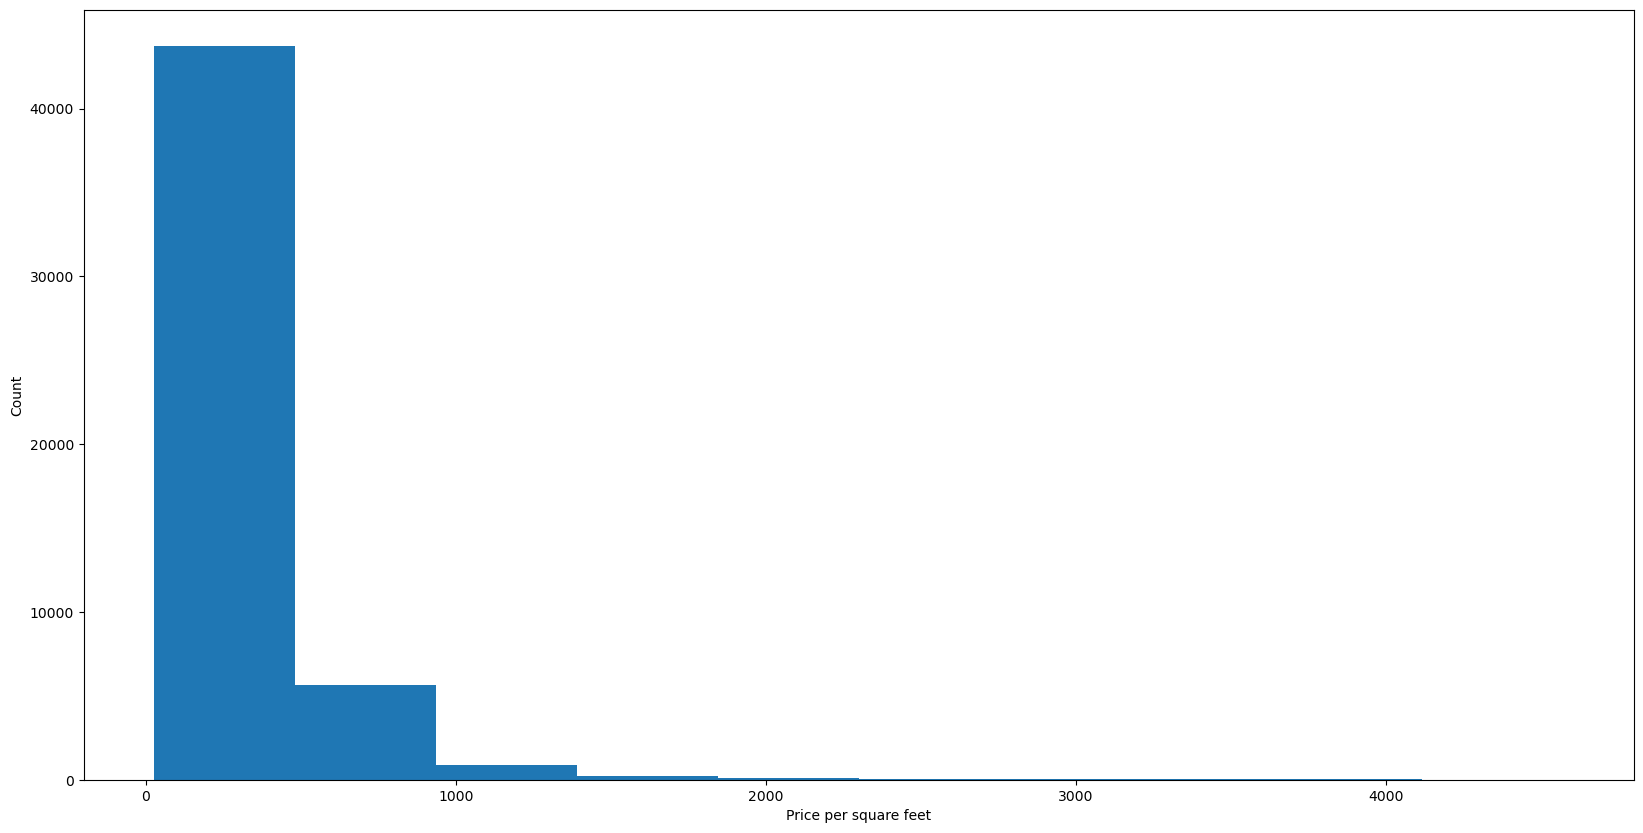

In [77]:
# Plot a histogram with price per square feet and count of data points
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(re_df_cleaned4.price_per_sqft)
plt.xlabel("Price per square feet")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

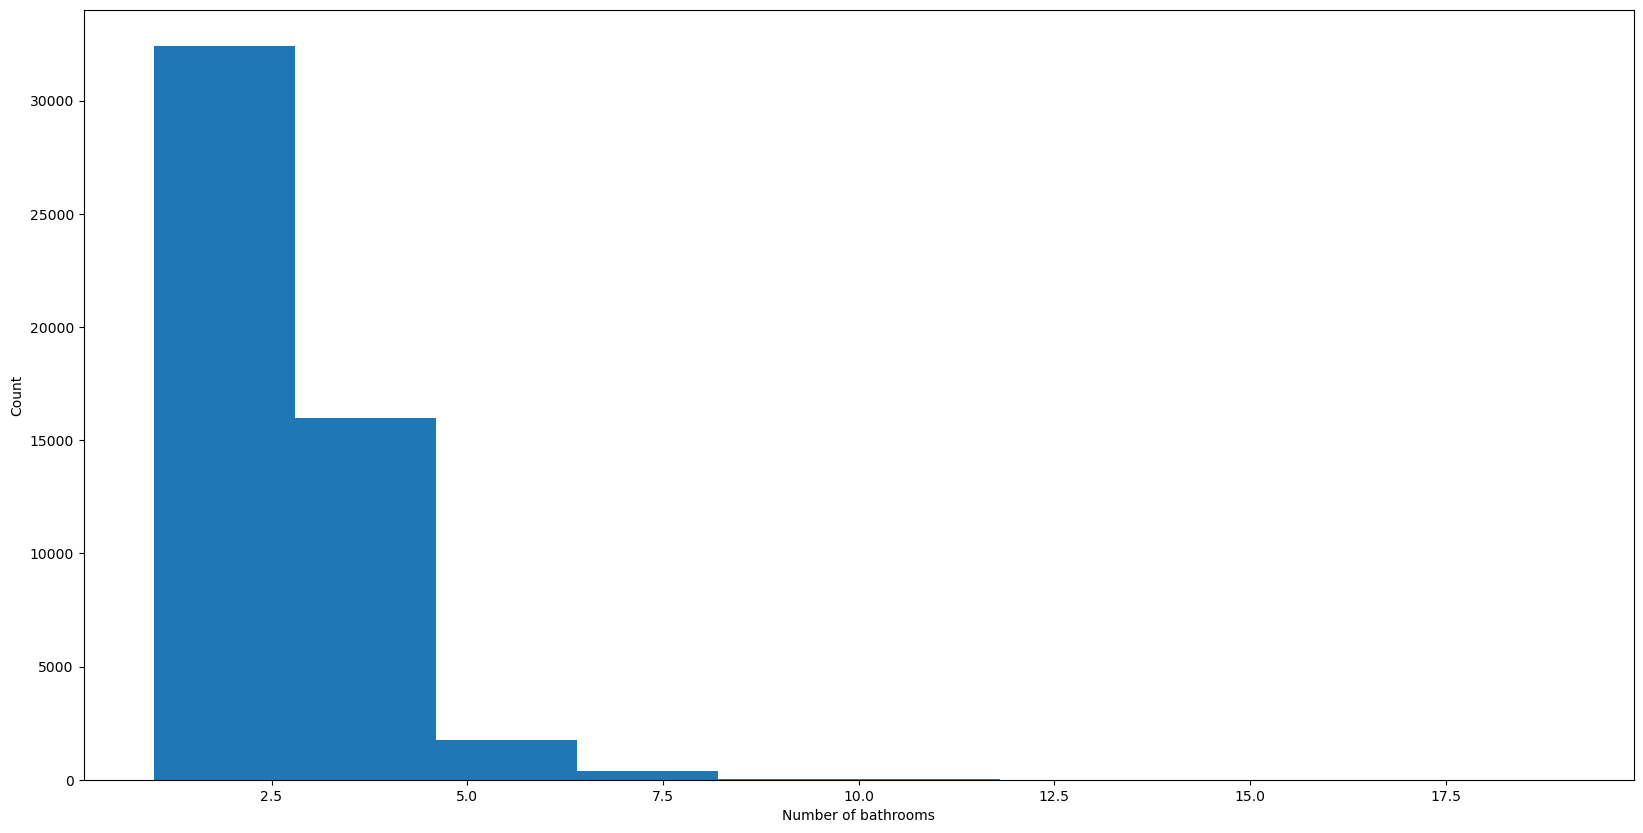

In [78]:
# Plot a histogram with number of bathrooms and count of data points
plt.hist(re_df_cleaned4.bath)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

In [79]:
# Finding out data points where number of bathrooms is greater than bedrooms + 2
re_df_cleaned4[re_df_cleaned4.bath>re_df_cleaned4.bed+2]

,price,bed,bath,city,zip_code,house_size,price_per_sqft
725,2680000.0,5.0,8.0,Aventura,33180.0,5953.0,450.19
1302,6295000.0,6.0,10.0,Bal Harbour,33154.0,6738.0,934.25
1355,35000000.0,8.0,11.0,Bal Harbour,33154.0,12082.0,2896.87
1367,23500000.0,4.0,7.0,Bal Harbour,33154.0,7534.0,3119.19
1879,5950000.0,5.0,8.0,Boca Raton,33431.0,7254.0,820.24
...,...,...,...,...,...,...,...
48746,2950000.0,6.0,9.0,Weston,33326.0,7138.0,413.28
49051,2750000.0,5.0,8.0,Windermere,34786.0,5683.0,483.90
49078,10000000.0,6.0,15.0,Windermere,34786.0,24080.0,415.28
49140,2600000.0,5.0,9.0,Windermere,34786.0,6011.0,432.54


In [81]:
# Removing data points where number of bathrooms is greater than bedrooms + 2
re_df_cleaned5 = re_df_cleaned4[~(re_df_cleaned4.bath>re_df_cleaned4.bed+2)]
re_df_cleaned5.shape

(50501, 7)

In [83]:
# Drop price_per_sqft,zip_code columns
re_df_cleaned6 = re_df_cleaned5.drop(columns=['price_per_sqft','zip_code'])
re_df_cleaned6.head()

,price,bed,bath,city,house_size
0,179000.0,2.0,2.0,Altamonte Springs,1209.0
1,425000.0,3.0,2.0,Altamonte Springs,1866.0
2,349997.0,4.0,2.0,Altamonte Springs,1420.0
3,400000.0,3.0,2.0,Altamonte Springs,1675.0
4,379900.0,3.0,2.0,Altamonte Springs,1766.0


# Build Machine Learning Algorithm

In [87]:
# Ensure the 'city' column is of string type
re_df_cleaned6['city'] = re_df_cleaned6['city'].astype(str)

In [94]:
# Create dummy variables for the 'city' column
city_dummies = pd.get_dummies(re_df_cleaned6['city'])

# Ensure the dummy variables are 0 and 1
city_dummies = city_dummies.astype(int)

# Print dummy variables
city_dummies

,Altamonte Springs,Apollo Beach,Apopka,Arcadia,Atlantis,Auburndale,Aventura,Avon Park,Babson Park,Bal Harbour,...,Wilton Manors,Wimauma,Windermere,Winter Garden,Winter Haven,Winter Park,Winter Springs,Zellwood,Zephyrhills,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50618,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
50619,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
50620,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
50621,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [96]:
# Dropping 'other' column
re_df_cleaned7 = pd.concat([re_df_cleaned6,city_dummies.drop('other',axis='columns')],axis='columns')
re_df_cleaned7.head(3)

,price,bed,bath,city,house_size,Altamonte Springs,Apollo Beach,Apopka,Arcadia,Atlantis,...,Weston,Wilton Manors,Wimauma,Windermere,Winter Garden,Winter Haven,Winter Park,Winter Springs,Zellwood,Zephyrhills
0,179000.0,2.0,2.0,Altamonte Springs,1209.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,425000.0,3.0,2.0,Altamonte Springs,1866.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,349997.0,4.0,2.0,Altamonte Springs,1420.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [97]:
# Dropping city column
re_df_cleaned8 = re_df_cleaned7.drop('city',axis='columns')
re_df_cleaned8.head(2)

,price,bed,bath,house_size,Altamonte Springs,Apollo Beach,Apopka,Arcadia,Atlantis,Auburndale,...,Weston,Wilton Manors,Wimauma,Windermere,Winter Garden,Winter Haven,Winter Park,Winter Springs,Zellwood,Zephyrhills
0,179000.0,2.0,2.0,1209.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,425000.0,3.0,2.0,1866.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [98]:
re_df_cleaned8.shape

(50501, 261)

In [138]:
# Create x and y axis for the dataset
x = re_df_cleaned8.drop('price',axis='columns')
x.shape

x.head()

,bed,bath,house_size,Altamonte Springs,Apollo Beach,Apopka,Arcadia,Atlantis,Auburndale,Aventura,...,Weston,Wilton Manors,Wimauma,Windermere,Winter Garden,Winter Haven,Winter Park,Winter Springs,Zellwood,Zephyrhills
0,2.0,2.0,1209.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3.0,2.0,1866.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4.0,2.0,1420.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3.0,2.0,1675.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3.0,2.0,1766.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [134]:
y = re_df_cleaned8.price
y.shape
y.head()

0    179000.0
1    425000.0
2    349997.0
3    400000.0
4    379900.0
Name: price, dtype: float64

In [101]:
# Import the train_test_split function from scikit-learn's model_selection module
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets with 80% data used for training and 20% used for testing
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=10)

In [105]:
# Import the LinearRegression class from scikit-learn's linear_model module
from sklearn.linear_model import LinearRegression

# Create an instance of the LinearRegression class, which represents the linear regression model
lr_clf = LinearRegression()

# Train the linear regression model using the training data
lr_clf.fit(x_train,y_train)

# Evaluate the model's performance using the testing data and return the coefficient of determination (R^2 score)
lr_clf.score(x_test,y_test)

0.6783509873665161

In [106]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(),x,y, cv=cv)

array([0.6567242 , 0.56703656, 0.58626531, 0.64158163, 0.60729462])

In [149]:
x.columns

Index(['bed', 'bath', 'house_size', 'Altamonte Springs', 'Apollo Beach',
       'Apopka', 'Arcadia', 'Atlantis', 'Auburndale', 'Aventura',
       ...
       'Weston', 'Wilton Manors', 'Wimauma', 'Windermere', 'Winter Garden',
       'Winter Haven', 'Winter Park', 'Winter Springs', 'Zellwood',
       'Zephyrhills'],
      dtype='object', length=260)

In [141]:
import numpy as np

def predict_price(bed, bath, sqft, city):    
    # Check if city exists in the columns
    if city in x.columns:
        loc_index = np.where(x.columns == city)[0][0]
    else:
        loc_index = -1  # Set to -1 if city is not found
    
    # Create a zero array of the same length as the number of columns in x
    x1 = np.zeros(len(x.columns))
    
    # Assign the input features to the appropriate positions in the array
    x1[0] = bed
    x1[1] = bath
    x1[2] = sqft
    
    # If the city is found, set its position to 1
    if loc_index >= 0:
        x1[loc_index] = 1
    
    # Reshape x1 to a 2D array (1 sample, many features)
    x1 = x1.reshape(1, -1)
    
    # Return the predicted price using the trained model
    return lr_clf.predict(x1)[0]


In [148]:
# Check whether the model is working
predict_price(3, 2, 2000, 'Wimauma')

C:\Users\ipsit\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


354940.5464526905

# Export the tested model to a pickle file

In [151]:
import pickle
with open('florida_home_prices_model.pickle','wb') as f:
    pickle.dump(lr_clf,f)

# Export location and column information to a file that will be useful later on in our prediction application

In [152]:
import json
columns = {
    'data_columns' : [col.lower() for col in x.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))